### Bias-Variance Tradeoff Visualization

The bias-variance tradeoff is a core concept in machine learning, describing the conflict between a model's ability to minimize bias (error from overly simplistic assumptions, leading to underfitting) and minimize variance (error from oversensitivity to the training data, leading to overfitting).

A common way to demonstrate this is by using Polynomial Regression to model data, where the degree of the polynomial acts as a proxy for model complexity.

Here is a Python code snippet that visualizes the bias-variance tradeoff using synthetic data and polynomial regression models of different degrees.

This code generates synthetic data following a quadratic curve, adds noise, and then trains polynomial regression models with degrees 1 (high bias/underfit), 2 (optimal fit), and 10 (high variance/overfit) to illustrate the trade-off.

[-4.79415506 -4.65611479 -4.53549587 -4.41916388 -4.34948407 -4.02327886
 -3.77961765 -3.60506139 -3.4400548  -3.4398136  -3.29475876 -3.18175033
 -3.1659549  -3.15145544 -3.00326218 -2.87660889 -2.41220018 -2.0877086
 -2.07855351 -1.95757757 -1.95386231 -1.88288924 -1.33638157 -1.25459881
 -0.68054981 -0.59847506 -0.43930016 -0.0482309   0.14234438  0.20068021
  0.24756432  0.46710279  0.92414569  0.98658484  1.01115012  1.07544852
  1.11852895  1.62522284  1.84233027  2.08072578  2.31993942  2.85175961
  3.08397348  3.32442641  3.66176146  4.09320402  4.48885537  4.50714306
  4.65632033  4.69909852]


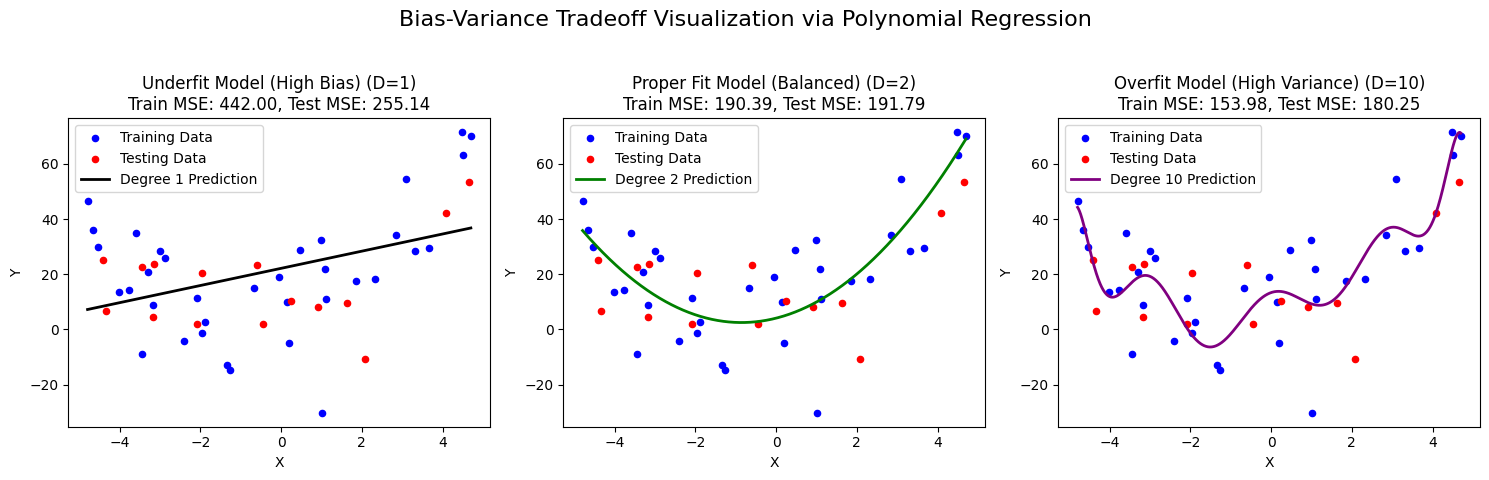

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# --- 1. Generate Synthetic Data ---
np.random.seed(42) # For reproducibility
X = np.sort(np.random.uniform(-5, 5, 50))
print (X)
# True function: y = 2x^2 + 3x + 4 + noise
y_true = 2 * X**2 + 3 * X + 4
y = y_true + np.random.normal(0, 15, size=X.shape) 

X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Generate smooth x-values for plotting the model curves
X_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# --- 2. Define Model Complexities (Degrees) ---
degrees = [1, 2, 10]
titles = {
    1: 'Underfit Model (High Bias)',
    2: 'Proper Fit Model (Balanced)',
    10: 'Overfit Model (High Variance)'
}
colors = {1: 'black', 2: 'green', 10: 'purple'}

plt.figure(figsize=(15, 5))
plt.suptitle('Bias-Variance Tradeoff Visualization via Polynomial Regression', fontsize=16)


for i, degree in enumerate(degrees):
    # --- 3. Train Model ---
    # Use a pipeline to chain PolynomialFeatures and LinearRegression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # --- 4. Evaluate Error ---
    # Training Error (MSE)
    y_train_pred = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_train_pred)

    # Testing Error (MSE) - Crucial for evaluating generalization
    y_test_pred = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Predict smooth curve for plotting
    y_plot = model.predict(X_plot)

    # --- 5. Plot Results ---
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, color='blue', s=20, label='Training Data')
    plt.scatter(X_test, y_test, color='red', s=20, label='Testing Data')
    plt.plot(X_plot, y_plot, color=colors[degree], linewidth=2, label=f'Degree {degree} Prediction')
    
    plt.title(f'{titles[degree]} (D={degree})\nTrain MSE: {train_error:.2f}, Test MSE: {test_error:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
